<h1 style='color:Orange' align='center'> Lending Club Loan Data Analysis </h4>

#### Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import random, os

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.shape

(9578, 14)

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

####  Feature Transformation

In [6]:
df['purpose'] = LabelEncoder().fit_transform(df['purpose'])

In [7]:
for i in df:
    print(f'{i} : {df[i].unique()}')

credit.policy : [1 0]
purpose : [2 1 0 4 6 5 3]
int.rate : [0.1189 0.1071 0.1357 0.1008 0.1426 0.0788 0.1496 0.1114 0.1134 0.1221
 0.1347 0.1324 0.0859 0.0714 0.0863 0.1103 0.1317 0.0894 0.1039 0.1513
 0.08   0.1355 0.1229 0.0901 0.0743 0.1375 0.0807 0.1028 0.087  0.1122
 0.0996 0.0933 0.0838 0.0775 0.1059 0.1596 0.1154 0.1343 0.1249 0.0964
 0.1186 0.1501 0.128  0.1091 0.1217 0.1533 0.0712 0.1438 0.1565 0.1467
 0.1312 0.147  0.1407 0.1014 0.1046 0.133  0.0983 0.1393 0.092  0.1236
 0.1362 0.1078 0.1583 0.1109 0.1141 0.1267 0.1204 0.0951 0.1172 0.1299
 0.1488 0.152  0.1425 0.1836 0.1615 0.06   0.0832 0.1261 0.0945 0.1197
 0.1387 0.0976 0.1292 0.0737 0.0768 0.1166 0.1418 0.1545 0.1482 0.1703
 0.145  0.1671 0.1576 0.1608 0.164  0.1734 0.1051 0.157  0.1222 0.1273
 0.1379 0.1253 0.1128 0.1286 0.1287 0.097  0.1001 0.1538 0.1191 0.1254
 0.1159 0.138  0.1096 0.1064 0.1349 0.1033 0.1475 0.1601 0.1507 0.1412
 0.1633 0.1696 0.1146 0.1304 0.1272 0.1209 0.1083 0.1178 0.1241 0.1588
 0.0907 0.102  0.1

In [8]:
mms_cols = ['installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util']

mms = MinMaxScaler()
df[mms_cols] = mms.fit_transform(df[mms_cols])

In [9]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0,0,0,0
1,1,1,0.1071,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0,0,0,0
2,1,2,0.1357,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,1,0,0,0
3,1,2,0.1008,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,1,0,0,0
4,1,1,0.1426,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0,1,0,0


In [10]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

#### Exploratory data analysis of different factors of the dataset

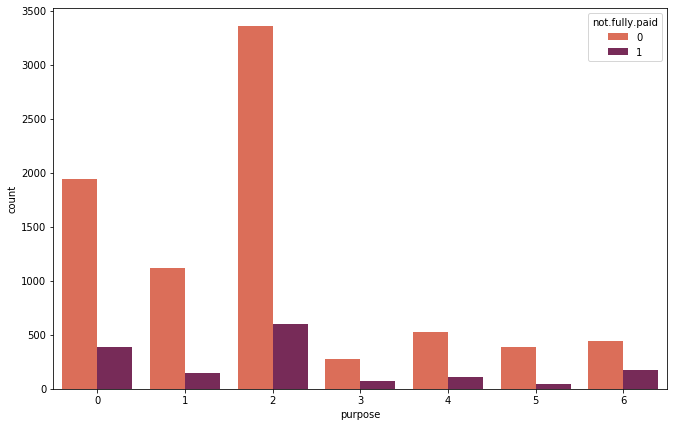

In [11]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='rocket_r')

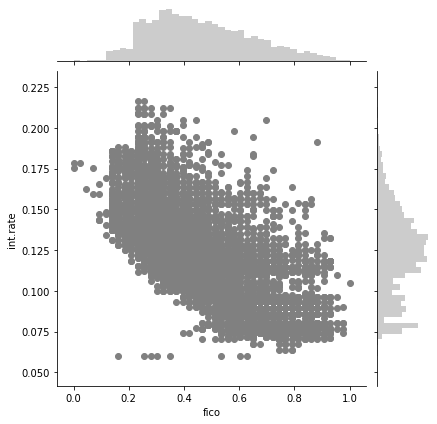

In [12]:
sns.jointplot(x='fico',y='int.rate',data=df,color='grey')

<Figure size 792x504 with 0 Axes>

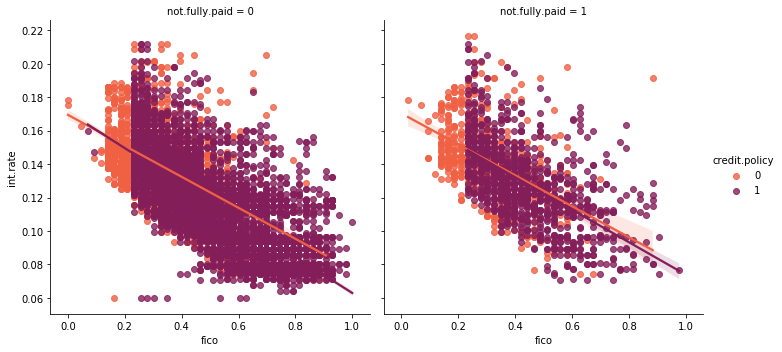

In [13]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='rocket_r')

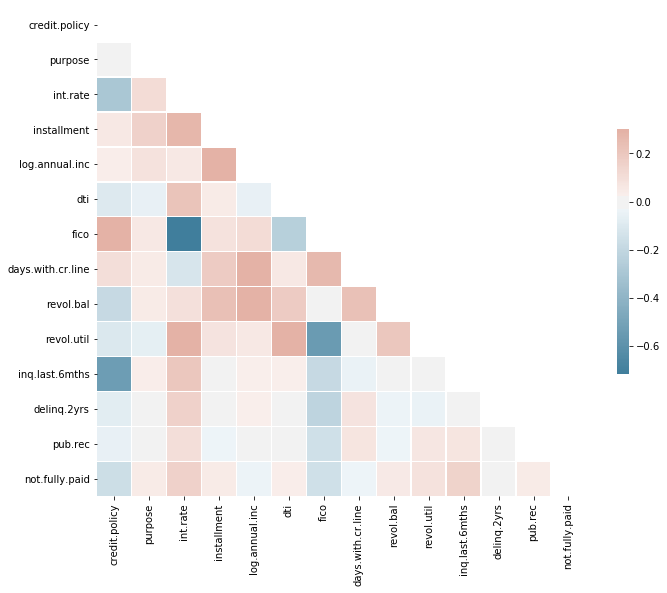

In [14]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Modeling

In [15]:
df_train = df.drop('not.fully.paid',axis=1)
df_test = df['not.fully.paid']

Text(0.5, 1.0, 'Target count')

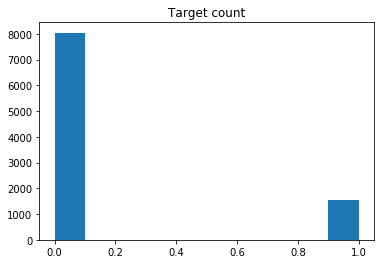

In [16]:
plt.hist(df_test)
plt.title("Target count")

In [17]:
df_test.value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
x, y = smote.fit_sample(df_train,df_test)

Text(0.5, 1.0, 'Target counts after scaling')

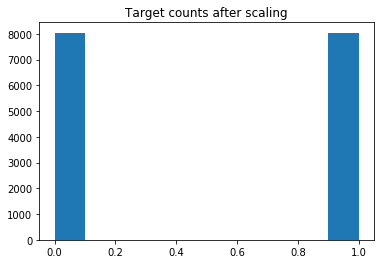

In [19]:
plt.hist(y)
plt.title("Target counts after scaling")

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y)
print("\nShape of train test split\n")
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


Shape of train test split

(12067, 13)
(4023, 13)
(12067,)
(4023,)


<h3 style='color:Blue' align='center'> Light GBM </h3>

In [21]:
SEED = 2021
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)

In [22]:
NUM_OF_BOOST_ROUND = 10000
EARLY_STOPPING = 300
params = {
    'metric': 'auc',
    'seed': SEED,
    'n_estimators': NUM_OF_BOOST_ROUND
}

In [23]:
bst = LGBMClassifier(**params, early_stopping_rounds=EARLY_STOPPING)

In [24]:
bst.fit(xtrain, ytrain,  eval_set=(xtest, ytest), early_stopping_rounds=100, verbose=-1)

[LightGBM] [Warning] early_stopping_round is set=300, early_stopping_rounds=300 will be ignored. Current value: early_stopping_round=300
Training until validation scores don't improve for 300 rounds


C:\Users\HP\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Early stopping, best iteration is:
[3281]	valid_0's auc: 0.954984


LGBMClassifier(early_stopping_rounds=300, metric='auc', n_estimators=10000,
               seed=2021)

In [25]:
ypred_lgb = bst.predict_proba(xtest)[:,1]

ypred_lgb = ypred_lgb.flatten()
ypred_lgb = np.round(ypred_lgb)

ypred_lgb

array([0., 0., 0., ..., 1., 1., 1.])

In [26]:
print("Classification Report: \n", classification_report(ytest, ypred_lgb))

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      2021
           1       0.93      0.85      0.89      2002

    accuracy                           0.89      4023
   macro avg       0.89      0.89      0.89      4023
weighted avg       0.89      0.89      0.89      4023



In [27]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(ytest, ypred_lgb)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[1884  137]
 [ 301 1701]]
Accuracy :  0.8911260253542133
Sensitivity :  0.9322117763483424
Specificity :  0.8496503496503497


In [28]:
probs = bst.predict_proba(xtest)
preds = probs[:,1]

preds

array([1.27578357e-04, 2.34683785e-04, 5.75631740e-06, ...,
       9.99963388e-01, 9.99986240e-01, 7.95545442e-01])

In [29]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

roc_auc

0.954984154885194

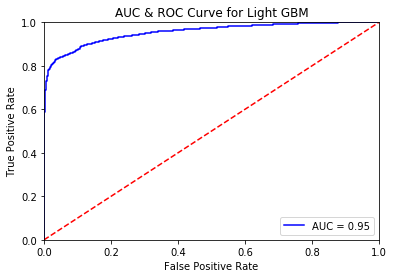

In [30]:
plt.title('AUC & ROC Curve for Light GBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3 style='color:Blue' align='center'> Artificial Neural Network (ANN) </h3>

In [31]:
print('\n Neural network starts\n')

ann_regular = keras.Sequential([
keras.layers.Dense(13, input_shape=(13,),activation='relu'),
keras.layers.Dense(5,activation='relu'),
keras.layers.Dense(1,activation='sigmoid')
])

ann_regular.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

ann_regular.fit(xtrain,ytrain,epochs=100)


 Neural network starts

Epoch 1/100
378/378 [==============================] - 2s 2ms/step - loss: 0.7260 - accuracy: 0.4987
Epoch 2/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6562 - accuracy: 0.6142
Epoch 3/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6556 - accuracy: 0.6071
Epoch 4/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6506 - accuracy: 0.6178
Epoch 5/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6486 - accuracy: 0.6134
Epoch 6/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6413 - accuracy: 0.6176
Epoch 7/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6411 - accuracy: 0.6201
Epoch 8/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6400 - accuracy: 0.6200
Epoch 9/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6359 - accuracy: 0.6304
Epoch 10/100
378/378 [==============================] - 1s 2ms/ste

378/378 [==============================] - 1s 2ms/step - loss: 0.6053 - accuracy: 0.6548
Epoch 82/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6056 - accuracy: 0.6618
Epoch 83/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6037 - accuracy: 0.6597
Epoch 84/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6044 - accuracy: 0.6642
Epoch 85/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6035 - accuracy: 0.6581
Epoch 86/100
378/378 [==============================] - 1s 2ms/step - loss: 0.5989 - accuracy: 0.6674
Epoch 87/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6062 - accuracy: 0.6602
Epoch 88/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6041 - accuracy: 0.6605
Epoch 89/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6030 - accuracy: 0.6640
Epoch 90/100
378/378 [==============================] - 1s 2ms/step - loss: 0.6007 - accuracy: 

In [32]:
ann_regular.evaluate(xtest,ytest)

126/126 [==============================] - 0s 1ms/step - loss: 0.6165 - accuracy: 0.6468


[0.6164591908454895, 0.6467810273170471]

In [33]:
ypred_ann = ann_regular.predict(xtest)
ypred_ann = np.round(ypred_ann)

In [34]:
print("Classification Report: \n", classification_report(ytest, ypred_ann))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.62      0.64      2021
           1       0.64      0.68      0.66      2002

    accuracy                           0.65      4023
   macro avg       0.65      0.65      0.65      4023
weighted avg       0.65      0.65      0.65      4023



In [35]:
cm2 = confusion_matrix(ytest, ypred_ann)
print('Confusion Matrix : \n', cm2)

total1=sum(sum(cm2))
accuracy1=(cm2[0,0]+cm2[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity1)


Confusion Matrix : 
 [[1243  778]
 [ 643 1359]]
Accuracy :  0.6467810091971166
Sensitivity :  0.6150420583869372
Specificity :  0.6788211788211789


In [36]:
probs = ann_regular.predict_proba(xtest)
preds = probs[::1]


C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [37]:
fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
roc_auc = metrics.auc(fpr, tpr)

roc_auc


0.7154989987746049

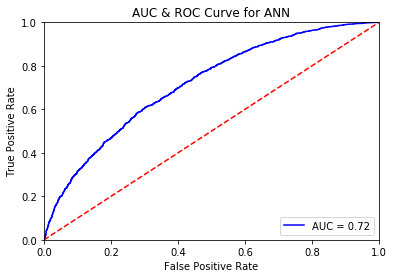

In [38]:
plt.title('AUC & ROC Curve for ANN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3 style='color:Black' font='Bold' align='left'> According the reports and prediction scores, LightGBM model given the best scores </h3>